In [10]:
#Dependencies
import requests
import json
from api_keys import api_key_FBI
import pandas as pd

import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [4]:
# the abbreviation of every state.
state_codes = pd.DataFrame({"Abbreviation":['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT',"DC",
                'DE', 'FL',"FS", 'GA',"GM", 'HI', 'IA',"ID", 'IL', 'IN',
                'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 
                'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 
                'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 
                'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 
                'TX', 'UT', 'VT', 'VA', 'WA', "VI",'WV', 'WI', 'WY']})

data_homicide=state_codes.copy()
data_homicide["Total Homicide"]=""
data_homicide.head()



,Abbreviation,Total Homicide
0,AL,
1,AK,
2,AZ,
3,AR,
4,CA,


# INFORMATION OF FBI HOMICIDE OF 2021

In [7]:
for index,row in data_homicide.iterrows():
    try:
        #with this we get the information of FBI API
        state=row["Abbreviation"]
        base_url=f"https://api.usa.gov/crime/fbi/cde/shr/state/{state}/victim/sex?from=2021&to=2021&API_KEY={api_key_FBI}"
        #print(base_url)
        response = requests.get(base_url)
        response= response.json()

        data_homicide.loc[index,"Total Homicide"]=response["data"][0]["Unknown"]+response["data"][0]["Male"]+response["data"][0]["Female"]
    except:
        data_homicide.loc[index,"Total Homicide"]=None

data_homicide.head(54)
# List all 54 states in order showing the number of total Homicides   


,Abbreviation,Total Homicide
0,AL,309
1,AK,18
2,AZ,190
3,AR,321
4,CA,123
5,CO,358
6,CT,148
7,DC,109
8,DE,94
9,FL,None


In [9]:
data_homicide=data_homicide.dropna(how="any")
data_homicide["Total Homicide"] = data_homicide["Total Homicide"].astype(int)
data_homicide=data_homicide.sort_values("Total Homicide")
data_homicide

,Abbreviation,Total Homicide
13,HI,6
47,VT,8
31,NH,14
36,ND,14
53,WY,17
1,AK,18
21,ME,18
43,SD,26
28,MT,31
15,ID,36


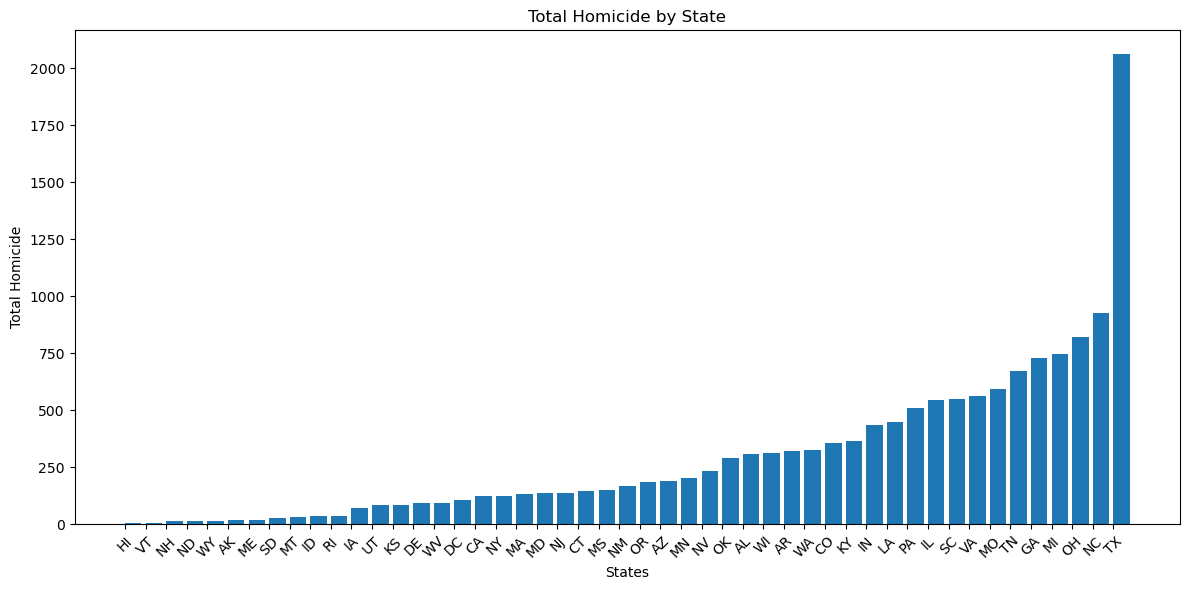

In [16]:
# Generate a bar plot showing the total number of rows 
plt.figure(figsize=(12,6))
plt.bar(data_homicide["Abbreviation"],data_homicide["Total Homicide"],align="edge",)

plt.xlabel('States')
plt.ylabel('Total Homicide')
plt.title('Total Homicide by State')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# INFORMATION OF COST LIVING

In [19]:
cost_living_data=pd.read_csv("resources/cost-of-living-index-by-state-[updated-june-2023].csv")
cost_living_data["Rank"]=cost_living_data["2023"]
cost_living_data["State"]=cost_living_data["state"]
cost_living_data=cost_living_data.loc[:,["State","Rank"]]

cost_living_data.head()


,State,Rank
0,Hawaii,179.0
1,District of Columbia,148.7
2,Massachusetts,148.4
3,California,134.5
4,New York,125.1


In [21]:
cost_living_data.dtypes

State     object
Rank     float64
dtype: object

# INFORMATION of HEALTH COST

In [22]:
health_data=pd.read_csv("resources/data-hGOWY.csv")
health_data.head()

,Rank,State,Score,% of adults reporting unmet need for mental health treatment in the past year who did not receive care because of cost,Health Care Spending Per Capita
0,1,South Dakota,100.00,47.10%,"$11,736"
1,2,Louisiana,86.69,32.00%,"$9,796"
2,3,West Virginia,82.31,39.50%,"$12,019"
3,4,Florida,79.51,51.90%,"$9,501"
4,5,Wyoming,78.63,64.70%,"$10,296"


In [23]:
health_data.dtypes

Rank                                                                                                                       object
State                                                                                                                      object
Score                                                                                                                     float64
% of adults reporting unmet need for mental health treatment in the past year who did not receive care because of cost     object
Health Care Spending Per Capita                                                                                            object
dtype: object

In [24]:
states_USA=pd.read_csv("resources/states.csv")
states_USA.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [30]:
resume=pd.merge(states_USA,health_data[["Score","State"]],on="State",how="inner")
resume = resume.rename(columns ={"Score": "Healthcare Rank"})
resume.head()

,State,Abbreviation,Healthcare Rank
0,Alabama,AL,49.21
1,Alaska,AK,64.97
2,Arizona,AZ,63.05
3,Arkansas,AR,42.03
4,California,CA,43.26


In [31]:
resume=pd.merge(resume,cost_living_data,on="State",how="inner")
resume = resume.rename(columns ={"Rank": "Cost Living Rank"})

resume.head()

,State,Abbreviation,Healthcare Rank,Cost Living Rank
0,Alabama,AL,49.21,88.8
1,Alaska,AK,64.97,124.4
2,Arizona,AZ,63.05,107.2
3,Arkansas,AR,42.03,90.3
4,California,CA,43.26,134.5


In [32]:
resume=pd.merge(resume,data_homicide,on="Abbreviation",how="inner")
resume.head()

,State,Abbreviation,Healthcare Rank,Cost Living Rank,Total Homicide
0,Alabama,AL,49.21,88.8,309
1,Alaska,AK,64.97,124.4,18
2,Arizona,AZ,63.05,107.2,190
3,Arkansas,AR,42.03,90.3,321
4,California,CA,43.26,134.5,123


In [33]:
resume.dtypes

State                object
Abbreviation         object
Healthcare Rank     float64
Cost Living Rank    float64
Total Homicide        int32
dtype: object

In [34]:
resume.count()

State               45
Abbreviation        45
Healthcare Rank     45
Cost Living Rank    45
Total Homicide      45
dtype: int64

In [104]:
resume.to_csv("resume_data.csv",index_label="State")

# PLOTTING


In [39]:
cost_living_rank= pd.DataFrame(resume["Cost Living Rank"])
health_rank=pd.DataFrame(resume["Healthcare Rank"])
homicide_rank=pd.DataFrame(resume["Total Homicide"])

## Bar Plot

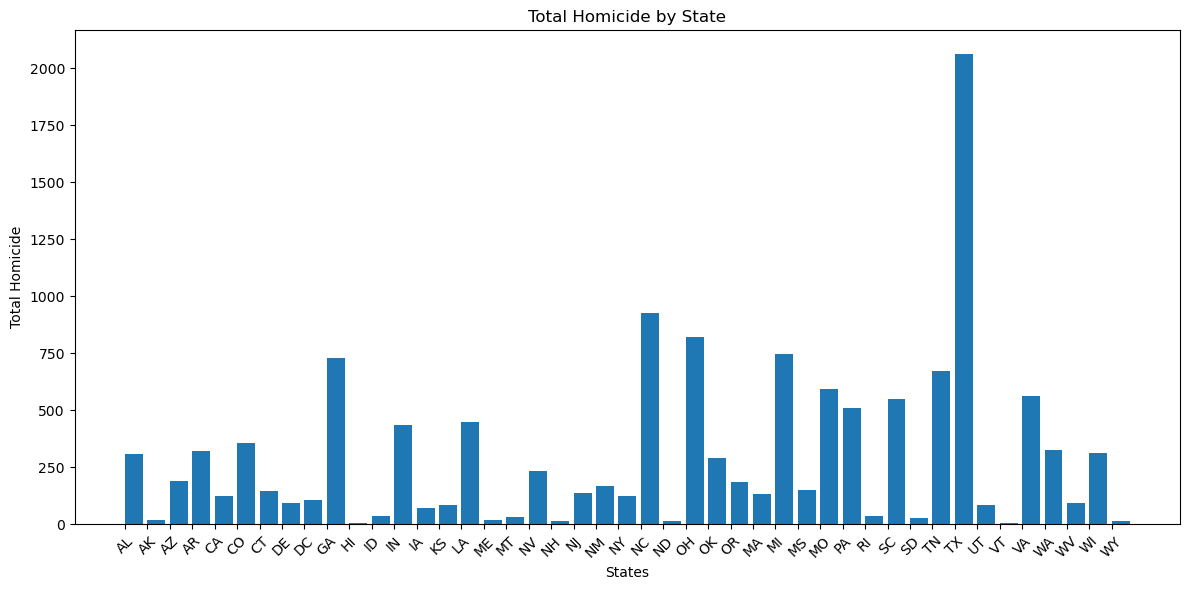

In [53]:
# Generate a bar plot showing the total number of rows 
plt.figure(figsize=(12,6))
plt.bar(resume["Abbreviation"],resume["Total Homicide"],align="edge",)

plt.xlabel('States')
plt.ylabel('Total Homicide')
plt.title('Total Homicide by State')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

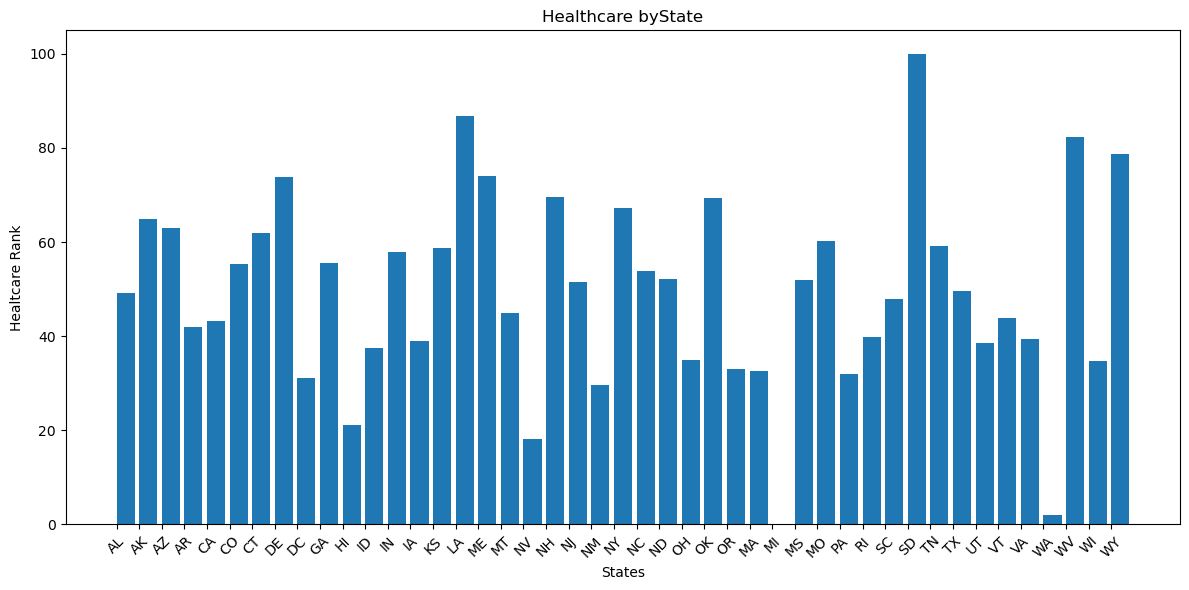

In [56]:
# Generate a bar plot showing the total number of rows 
plt.figure(figsize=(12,6))
plt.bar(resume["Abbreviation"],resume["Healthcare Rank"],align="edge",)

plt.xlabel('States')
plt.ylabel('Healtcare Rank')
plt.title("Healthcare byState")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

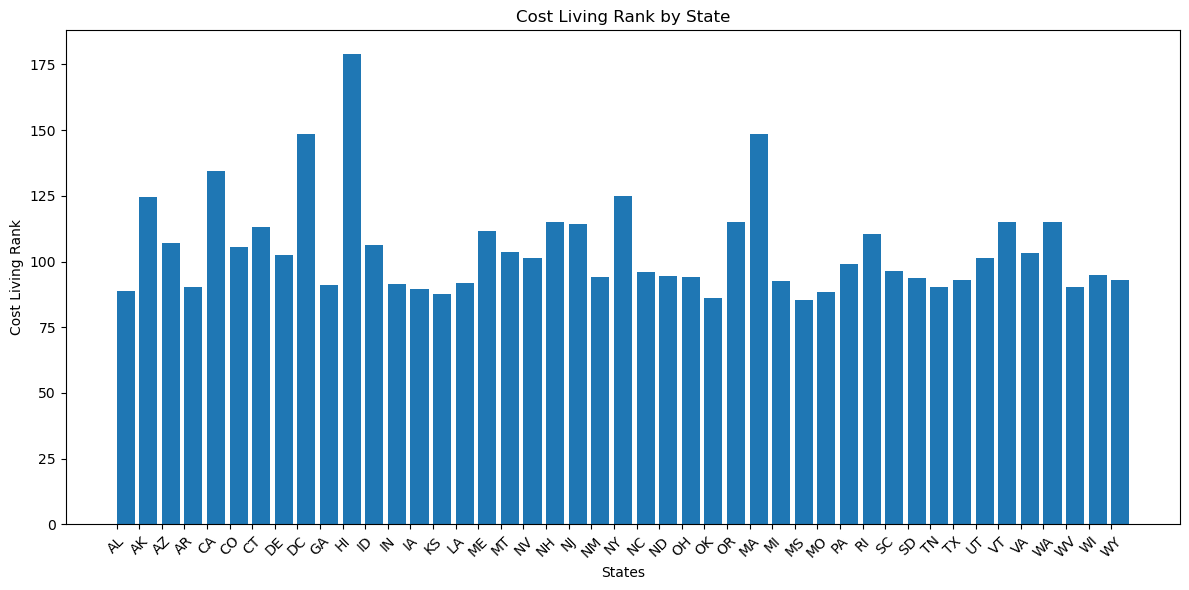

In [55]:
# Generate a bar plot showing the total number of rows 
plt.figure(figsize=(12,6))
plt.bar(resume["Abbreviation"],resume["Cost Living Rank"],align="edge",)

plt.xlabel('States')
plt.ylabel('Cost Living Rank')
plt.title('Cost Living Rank by State')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Scatter plot
### Healt vs Cost Living


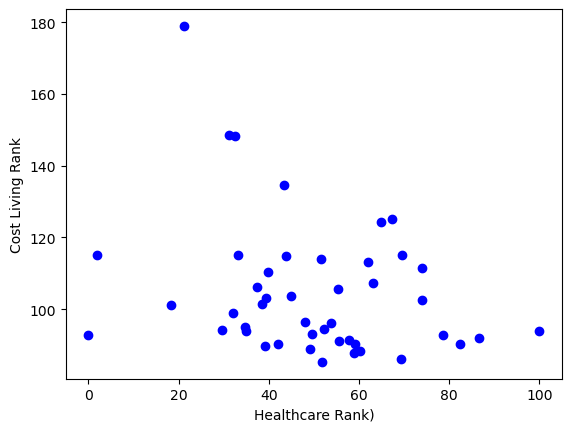

In [52]:
plt.scatter(health_rank,cost_living_rank,marker="o",facecolor="blue")
plt.xlabel("Healthcare Rank)")
plt.ylabel("Cost Living Rank")
plt.show()

#(slope,intercept,rvalue,pvalue,stderr) = st.linregress(health_rank,cost_living_rank) 
#regress_value=health_rank*slope+intercept
#line_eq= "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))




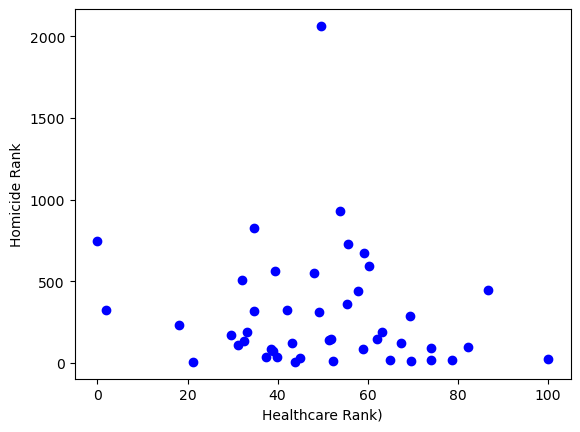

In [46]:

plt.scatter(health_rank,homicide_rank,marker="o",facecolor="blue")
plt.xlabel("Healthcare Rank)")
plt.ylabel("Homicide Rank")
plt.show()




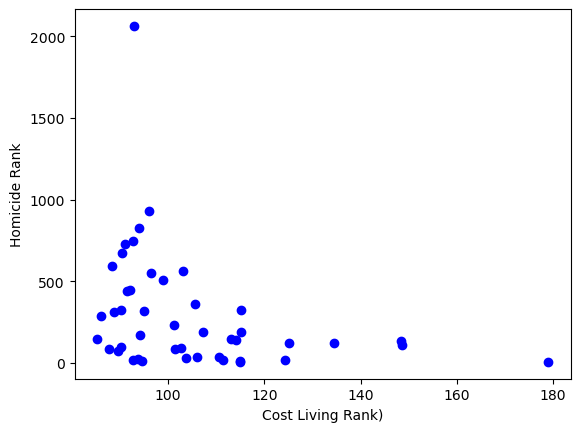

In [48]:

plt.scatter(cost_living_rank,homicide_rank,marker="o",facecolor="blue")
plt.xlabel("Cost Living Rank)")
plt.ylabel("Homicide Rank")
plt.show()

# Testing


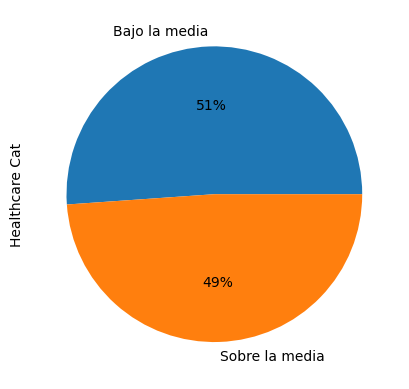

In [89]:
bins_health=[0,resume["Healthcare Rank"].mean(),resume["Healthcare Rank"].max()]
bins_health
labels=["Bajo la media","Sobre la media"]

resume_2=resume.copy()

resume_2["Healthcare Cat"]=pd.cut(resume_2["Healthcare Rank"],bins_health,labels=labels,include_lowest=True)
resume_2.head()


health_graf=resume_2.groupby("Healthcare Cat")
data_healt_df=health_graf["Healthcare Cat"].count()

pie_chart_health=data_healt_df.plot(kind="pie",y="Healthcare Cat",autopct='%1.0f%%')
#plt.axis("equal")
plt.show()



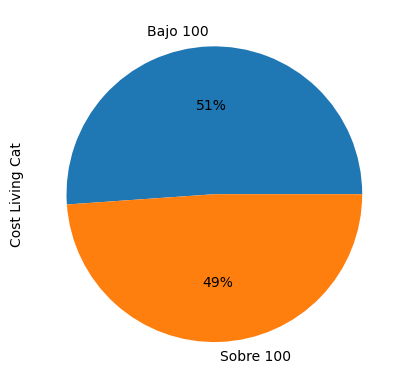

In [90]:
bins_cost=[0,100,resume["Cost Living Rank"].max()]
labels=["Bajo 100","Sobre 100"]

resume_2=resume.copy()

resume_2["Cost Living Cat"]=pd.cut(resume_2["Cost Living Rank"],bins_cost,labels=labels,include_lowest=True)
resume_2.head()

cost_graf=resume_2.groupby("Cost Living Cat")
data_cost_df=cost_graf["Cost Living Cat"].count()

pie_chart_cost=data_cost_df.plot(kind="pie",y="Cost Living Cat",autopct='%1.0f%%')
#plt.axis("equal")
plt.show()

296.4222222222222


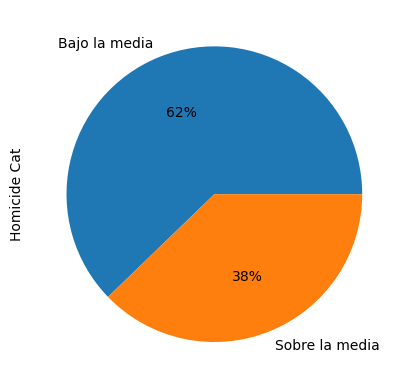

In [94]:
bins_homicide=[0,resume["Total Homicide"].mean(),resume["Total Homicide"].max()]
print(resume["Total Homicide"].mean())
labels=["Bajo la media","Sobre la media"]

resume_2=resume.copy()

resume_2["Homicide Cat"]=pd.cut(resume_2["Total Homicide"],bins_homicide,labels=labels,include_lowest=True)
resume_2.head()

hom_graf=resume_2.groupby("Homicide Cat")
data_hom_df=hom_graf["Homicide Cat"].count()

pie_chart_hom=data_hom_df.plot(kind="pie",y="Homicide Cat",autopct='%1.0f%%')
#plt.axis("equal")
plt.show()

# Testing 2

{'whiskers': [<matplotlib.lines.Line2D at 0x27bc1471360>,
 'caps': [<matplotlib.lines.Line2D at 0x27bc14718a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27bc14710c0>,
 'medians': [<matplotlib.lines.Line2D at 0x27bc1471de0>,
 'fliers': [<matplotlib.lines.Line2D at 0x27bc1472080>,
 'means': []}

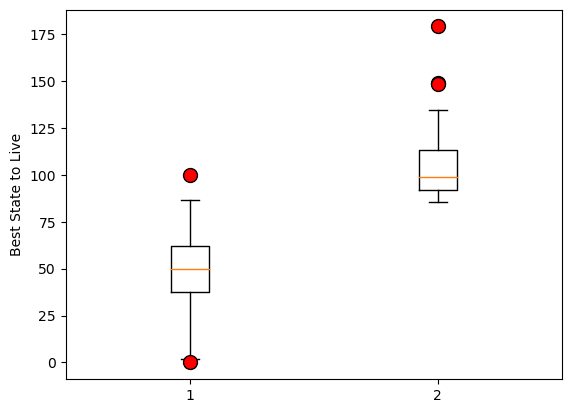

In [103]:
resume_3=resume.loc[:,["Healthcare Rank","Cost Living Rank"]]
resume_3
fig1,ax1=plt.subplots()

ax1.set_ylabel("Best State to Live")
ax1.boxplot(resume_3,flierprops=dict(markerfacecolor="red",markersize=10))

{'whiskers': [<matplotlib.lines.Line2D at 0x27bc14179a0>,
 'caps': [<matplotlib.lines.Line2D at 0x27bc1417ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27bc1417700>],
 'medians': [<matplotlib.lines.Line2D at 0x27bc1438460>],
 'fliers': [<matplotlib.lines.Line2D at 0x27bc1438700>],
 'means': []}

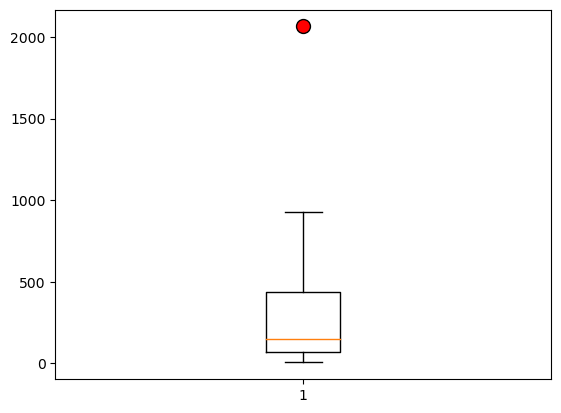

In [102]:
fig2,ax2=plt.subplots()
ax2.boxplot(resume["Total Homicide"],flierprops=dict(markerfacecolor="red",markersize=10))

#plt.show